In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sb

from sklearn.model_selection import train_test_split

C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv(r"D:\R Excel Sessions\Projects\Airline Predictions\Concatenate_B2C_B2E.csv")

C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,InvoiceDate,NetFare,ProductType,ItineraryType
0,01-12-2018 11:43,2160,Other Product,Domestic
1,01-12-2018 11:43,0.49,Other Product,Domestic
2,01-12-2018 13:01,6550,Air,Domestic
3,01-12-2018 13:10,6550,Air,Domestic
4,30-11-2018 14:30,5497,Air,Domestic


In [3]:
data.shape

(278466, 8)

In [4]:
df=data.iloc[:,:4]

In [5]:
df.head()

,InvoiceDate,NetFare,ProductType,ItineraryType
0,01-12-2018 11:43,2160,Other Product,Domestic
1,01-12-2018 11:43,0.49,Other Product,Domestic
2,01-12-2018 13:01,6550,Air,Domestic
3,01-12-2018 13:10,6550,Air,Domestic
4,30-11-2018 14:30,5497,Air,Domestic


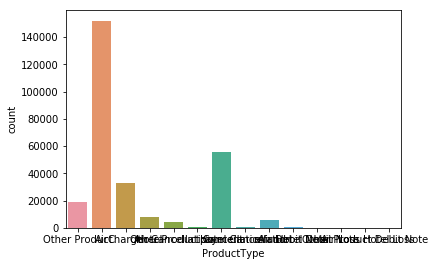

In [4]:
sb.countplot(x='ProductType',data=df)

In [4]:
df.columns

Index(['InvoiceDate', 'NetFare', 'ProductType', 'ItineraryType'], dtype='object')

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.head()


,InvoiceDate,NetFare,ProductType,ItineraryType
0,2018-01-12 11:43:00,2160,Other Product,Domestic
1,2018-01-12 11:43:00,0.49,Other Product,Domestic
2,2018-01-12 13:01:00,6550,Air,Domestic
3,2018-01-12 13:10:00,6550,Air,Domestic
4,2018-11-30 14:30:00,5497,Air,Domestic


In [40]:
df['ItineraryType'].value_counts()

Domestic         225231
International     20458
Name: ItineraryType, dtype: int64

In [14]:
#cols = df.columns.difference(['InvoiceDate'])
#if mixed dtypes
#df[cols] = df[cols].astype(str).astype(float)



In [15]:
#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

#df_n = df.set_index('InvoiceDate').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
#print (df_n)


                 NetFare  ProductType  ItineraryType
InvoiceDate                                         
2018-01-04   6475.677419          NaN            NaN
2018-01-05   5084.471910          NaN            NaN
2018-01-06   6686.804511          NaN            NaN
2018-01-07   4486.169231          NaN            NaN
2018-01-08   4528.097720          NaN            NaN
...                  ...          ...            ...
2019-12-01   3451.100140          NaN            NaN
2019-12-02   3364.630079          NaN            NaN
2019-12-03   4087.271619          NaN            NaN
2019-12-04   6290.409091          NaN            NaN
2019-12-05   3778.998371          NaN            NaN

[425 rows x 3 columns]


There are 425 observations which means for 425 days if we take the mean 

In [6]:
df['Month']= pd.DatetimeIndex(df['InvoiceDate']).month
df['Day']= pd.DatetimeIndex(df['InvoiceDate']).day
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour
df['weekday'] = pd.DatetimeIndex(df['InvoiceDate']).weekday



In [7]:
df=df.drop('InvoiceDate',axis=1)


In [8]:
df.head()

,NetFare,ProductType,ItineraryType,Month,Day,Year,hour,weekday
0,2160,Other Product,Domestic,1.0,12.0,2018.0,11.0,4.0
1,0.49,Other Product,Domestic,1.0,12.0,2018.0,11.0,4.0
2,6550,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
3,6550,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
4,5497,Air,Domestic,11.0,30.0,2018.0,14.0,4.0


In [8]:
df.dtypes

InvoiceDate      datetime64[ns]
NetFare                  object
ProductType              object
ItineraryType            object
Month                   float64
Day                     float64
Year                    float64
hour                    float64
weekday                 float64
dtype: object

In [9]:
df.isnull().sum()

NetFare          60890
ProductType          2
ItineraryType    32777
Month                2
Day                  2
Year                 2
hour                 2
weekday              2
dtype: int64

In [10]:
##As we see index no 180141 and 180143 contains all the null values, So dropping the rows

df=df.drop([180141, 180143])
df.isnull().sum()


NetFare          60889
ProductType          0
ItineraryType    32775
Month                0
Day                  0
Year                 0
hour                 0
weekday              0
dtype: int64

In [11]:
##Checking the null values for the 'ItineraryType' column
df[df.ItineraryType.isnull()]

df.loc[df.ProductType=='Charge','ProductType'].count()


32775

##Since all the charges are zero in the data as well as theree is no mention of iternity type, international or domestic. These variables are not giving any weightage to our data, Hence we will eliminate them

In [12]:
df=df[df.ProductType != 'Charge']


In [13]:
##Now lets check the null values for the 'ItineraryType' column
df[df.NetFare.isnull()]


,NetFare,ProductType,ItineraryType,Month,Day,Year,hour,weekday
1182,NaN,payment,Domestic,3.0,12.0,2018.0,11.0,0.0
1183,NaN,payment,Domestic,1.0,12.0,2018.0,21.0,4.0
1184,NaN,payment,Domestic,4.0,12.0,2018.0,10.0,3.0
1185,NaN,payment,Domestic,3.0,12.0,2018.0,20.0,0.0
1186,NaN,payment,Domestic,3.0,12.0,2018.0,16.0,0.0
...,...,...,...,...,...,...,...,...
186878,NaN,payment,Domestic,10.0,6.0,2019.0,23.0,6.0
186879,NaN,payment,Domestic,10.0,6.0,2019.0,23.0,6.0
186881,NaN,payment,Domestic,10.0,6.0,2019.0,23.0,6.0
186882,NaN,refund,Domestic,10.0,6.0,2019.0,23.0,6.0


In [14]:
##from the net fare it seems that the null value is for the payment and refund Product type
##lets count the numbers of payment and refund for our confirmtion
df.loc[df.ProductType=='payment','ProductType'].count()
df.loc[df.ProductType=='refund','ProductType'].count()

5495

In [15]:
## So as we found out that the total number of null values in the Netfare column is of the payment and refund producttype only
## It means we an assume that the company has not refunded any amout .So imputing those space with 0
df['NetFare']=df['NetFare'].fillna(0)

In [163]:
df.isna().sum()

NetFare          0
ProductType      0
ItineraryType    0
Month            0
Day              0
Year             0
hour             0
weekday          0
dtype: int64

In [16]:
##checking the datatype of the columns
df.dtypes
df['NetFare']=df['NetFare'].astype(float)


In [17]:
## checking the unique varibles of different columns
df['ProductType'].unique()


array(['Other Product', 'Air', 'Hotel', 'Air Cancellation',
       'Other Product Cancellation', 'payment', 'Hotel Cancellation',
       'refund', 'Air Debit Note', 'Hotel Debit Note', 'Air Loss',
       'Other Product Debit Note', 'Hotel Loss'], dtype=object)

In [18]:
df['ItineraryType'].unique()

array(['Domestic', 'International'], dtype=object)

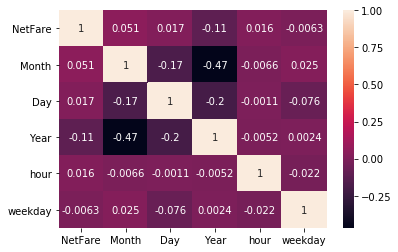

In [104]:
sb.heatmap(df.corr(),annot=True)

In [19]:
#Correlation
dummies = pd.DataFrame(pd.get_dummies(df, columns=["ProductType"]))
dummies = pd.DataFrame(pd.get_dummies(dummies, columns=["ItineraryType"]))
dummies['NetFare'] = pd.to_numeric(dummies['NetFare'] ,errors='coerce')
a=pd.DataFrame.corr(dummies)
a

,NetFare,Month,Day,Year,hour,weekday,ProductType_Air,ProductType_Air Cancellation,ProductType_Air Debit Note,ProductType_Air Loss,...,ProductType_Hotel Cancellation,ProductType_Hotel Debit Note,ProductType_Hotel Loss,ProductType_Other Product,ProductType_Other Product Cancellation,ProductType_Other Product Debit Note,ProductType_payment,ProductType_refund,ItineraryType_Domestic,ItineraryType_International
NetFare,1.000000,0.051275,0.016861,-0.107073,0.015560,-0.006284,0.293742,-0.146906,-0.018723,-0.017638,...,-0.047230,-0.001401,-0.002353,-0.106076,-0.021877,-0.003596,-0.218634,-0.061292,-0.237847,0.237847
Month,0.051275,1.000000,-0.172913,-0.466676,-0.006612,0.025203,0.150609,-0.034263,0.032762,0.003084,...,-0.004084,0.005773,0.000448,-0.054341,0.011130,0.006369,-0.125508,-0.036270,0.031316,-0.031316
Day,0.016861,-0.172913,1.000000,-0.199098,-0.001080,-0.075788,0.064806,0.006871,0.004572,0.000148,...,-0.002383,-0.000885,-0.001518,-0.018893,0.002904,0.006656,-0.061275,-0.012406,0.004549,-0.004549
Year,-0.107073,-0.466676,-0.199098,1.000000,-0.005181,0.002416,-0.371801,0.079252,-0.058709,-0.000029,...,0.016924,-0.005663,0.000233,0.137731,0.010596,-0.006117,0.299677,0.085384,-0.077346,0.077346
hour,0.015560,-0.006612,-0.001080,-0.005181,1.000000,-0.022241,0.008635,-0.012188,0.004272,0.000332,...,-0.001945,-0.000124,-0.001270,-0.005689,0.013682,-0.000222,-0.001654,-0.007519,-0.015110,0.015110
weekday,-0.006284,0.025203,-0.075788,0.002416,-0.022241,1.000000,-0.017841,0.002246,0.000413,-0.002343,...,0.007456,0.004144,-0.000999,0.010653,-0.005926,-0.001888,0.012653,0.003379,-0.003399,0.003399
ProductType_Air,0.293742,0.150609,0.064806,-0.371801,0.008635,-0.017841,1.000000,-0.175934,-0.059500,-0.037253,...,-0.043709,-0.004451,-0.005139,-0.365491,-0.060165,-0.011776,-0.687189,-0.192647,0.057484,-0.057484
ProductType_Air Cancellation,-0.146906,-0.034263,0.006871,0.079252,-0.012188,0.002246,-0.175934,1.000000,-0.006453,-0.004040,...,-0.004740,-0.000483,-0.000557,-0.039638,-0.006525,-0.001277,-0.074526,-0.020893,-0.012821,0.012821
ProductType_Air Debit Note,-0.018723,0.032762,0.004572,-0.058709,0.004272,0.000413,-0.059500,-0.006453,1.000000,-0.001366,...,-0.001603,-0.000163,-0.000188,-0.013405,-0.002207,-0.000432,-0.025204,-0.007066,-0.014049,0.014049
ProductType_Air Loss,-0.017638,0.003084,0.000148,-0.000029,0.000332,-0.002343,-0.037253,-0.004040,-0.001366,1.000000,...,-0.001004,-0.000102,-0.000118,-0.008393,-0.001382,-0.000270,-0.015780,-0.004424,0.001253,-0.001253


There is a low correlation of 0.29 between Netfare and Air which is significantly higher than other product Types. Also Netfare shows significantly moderate correlation with Intl internity type

## EDA for Product-Air and Iternity Type-Domestic  

In [167]:
#considering only air and domestic type 
df1=df[df['ProductType']=='Air']
df_dom=df1[df1['ItineraryType']=='Domestic']

In [168]:
df_dom.head()

,NetFare,ProductType,ItineraryType,Month,Day,Year,hour,weekday
2,6550.0,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
3,6550.0,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
4,5497.0,Air,Domestic,11.0,30.0,2018.0,14.0,4.0
5,4818.0,Air,Domestic,1.0,12.0,2018.0,14.0,4.0
6,1768.0,Air,Domestic,11.0,30.0,2018.0,14.0,4.0


In [170]:
df_dom.dtypes

NetFare          float64
ProductType       object
ItineraryType     object
Month            float64
Day              float64
Year             float64
hour             float64
weekday          float64
dtype: object

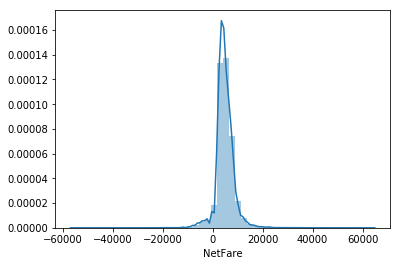

In [171]:
sb.distplot(df_dom.NetFare) 

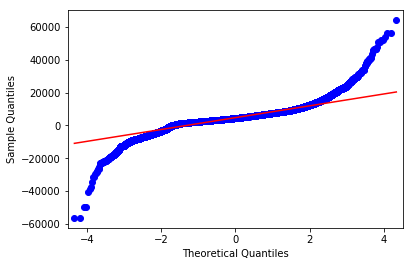

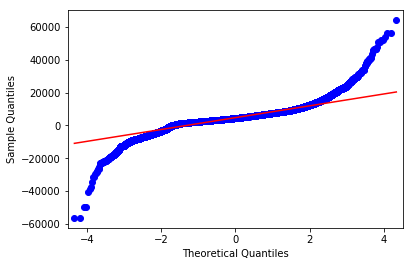

In [172]:

import statsmodels.api as sm
sm.qqplot(df_dom['NetFare'],line='s')

(array([4.0000e+00, 4.0000e+00, 3.5000e+01, 5.5400e+02, 5.6291e+04,
        8.3054e+04, 1.1780e+03, 9.2000e+01, 1.8000e+01, 4.0000e+00]),
 array([-56364. , -44314.5, -32265. , -20215.5,  -8166. ,   3883.5,
         15933. ,  27982.5,  40032. ,  52081.5,  64131. ]),
 <a list of 10 Patch objects>)

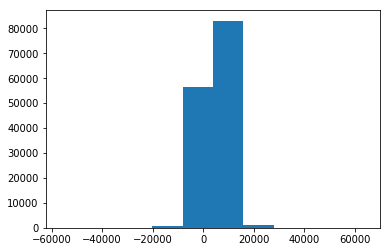

In [69]:
plt.hist(df_dom['NetFare'])

### Shapiro-wilk Test

In [72]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df_dom['NetFare'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.887, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


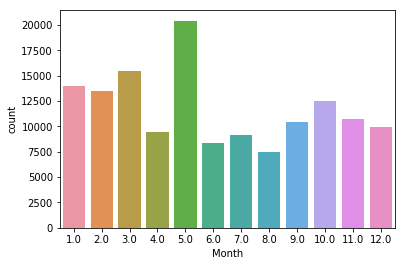

In [22]:
sb.countplot(x='Month',data=df_dom)
#df_dom.describe()

Highest Airtravel happened in the month of May whereas comparatively less airtravel in June - August obviously because of monsoon season whereas it stars picking up from September

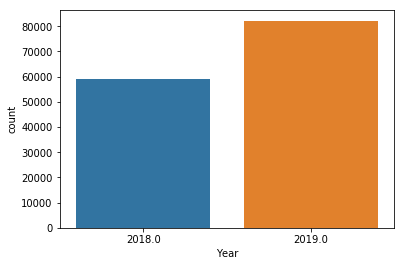

In [58]:
sb.countplot(x='Year',data=df_dom)

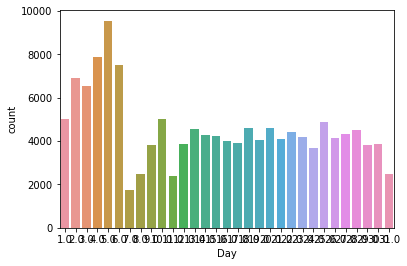

In [58]:
sb.countplot(x='Day',data=df_dom)

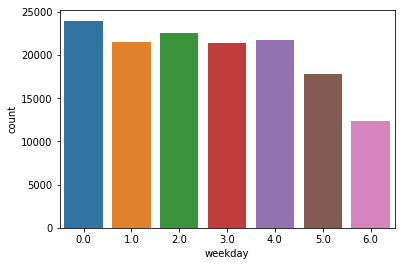

In [59]:
sb.countplot(x='weekday',data=df_dom)

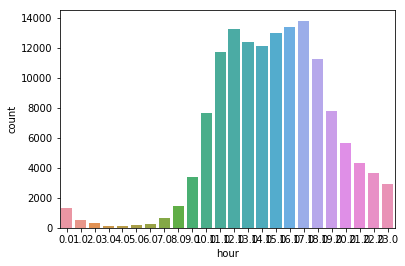

In [60]:
sb.countplot(x='hour',data=df_dom)

Increase in counts in the daytime starting from 7am in the morning

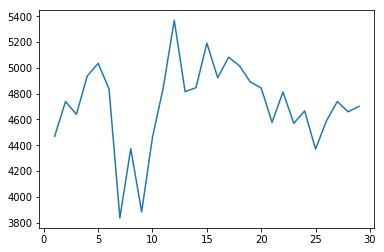

In [59]:
#plot of 31 days' avg netfare  
h=[]
r=range(1,30)
for i in r:
    d=df_dom[df_dom['Day']==i]
    Avg=np.mean(d['NetFare'])
    h.append(Avg)
    
plt.plot(r,h)

Highest average Netfare is noticed on 12th day of the month

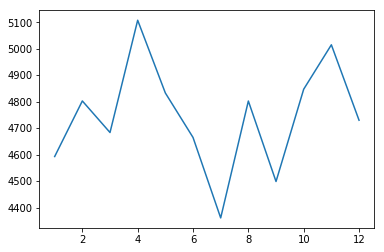

In [60]:
#plot of 12 months' avg netfare  
j=[]
r=range(1,13)
for i in r:
    d=df_dom[df_dom['Month']==i]
    Avg=np.mean(d['NetFare'])
    j.append(Avg)
    
plt.plot(r,j)

Hike in fare obeserved in the month of April and Nov Due to summer holidays and festival

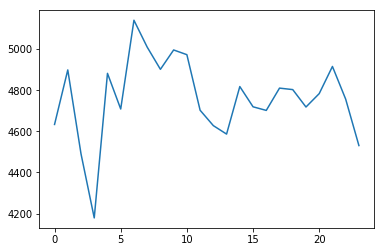

In [61]:
#plot of 24 hrs' avg netfare  
k=[]
r=range(0,24)
for i in range(0,24):
    Hrs=df_dom[df_dom['hour']==i]
    Avg=np.mean(Hrs['NetFare'])
    k.append(Avg)
plt.plot(r,k)

Low Avg netfare observed during night, it starts increasing from early morning. Post 20:00 , there is again a drop in the netfare

In [61]:
x.weekday.value_counts()

0.0    23961
2.0    22589
4.0    21712
1.0    21481
3.0    21331
5.0    17791
6.0    12369
Name: weekday, dtype: int64

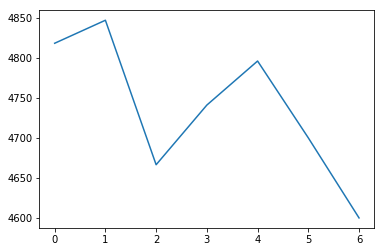

In [62]:
#plot of week days' avg netfare  
l=[]
r=range(0,7)
for i in range(0,7):
    Week=df_dom[df_dom['weekday']==i]
    Avg=np.mean(Week['NetFare'])
    l.append(Avg)
plt.plot(r,l)
#low price on thursdays and weekends

Netfare starts dropping from Tuesday and starts picking up from Wednesday and again drops from Friday which is surprising


# EDA for Product type-Air and Iternity Type-International

In [36]:
df2=df[df['ProductType']=='Air']
a=df2[df2['ItineraryType']=='International']
a.head()

,InvoiceDate,NetFare,ProductType,ItineraryType,Month,Day,Year,hour,weekday
62,2018-03-12 13:11:00,61143,Air,International,3.0,12.0,2018.0,13.0,0.0
66,2018-03-12 15:31:00,18850,Air,International,3.0,12.0,2018.0,15.0,0.0
74,2018-03-12 18:51:00,20806,Air,International,3.0,12.0,2018.0,18.0,0.0
108,2018-04-12 14:21:00,20806,Air,International,4.0,12.0,2018.0,14.0,3.0
125,2018-04-12 18:46:00,30557,Air,International,4.0,12.0,2018.0,18.0,3.0


In [39]:
a.columns

Index(['InvoiceDate', 'NetFare', 'ProductType', 'ItineraryType', 'Month',
       'Day', 'Year', 'hour', 'weekday'],
      dtype='object')

In [31]:
df.ItineraryType.value_counts()

Domestic         225231
International     20458
Name: ItineraryType, dtype: int64

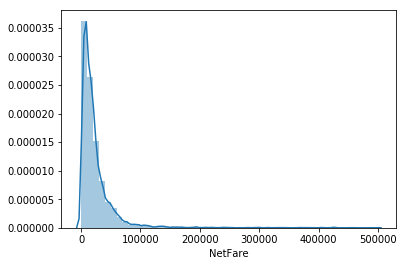

In [73]:
sb.distplot(a.NetFare) 

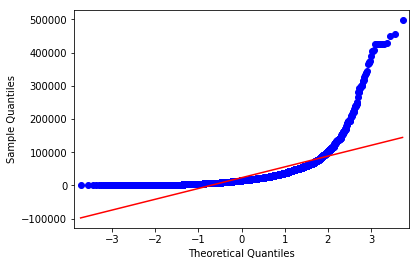

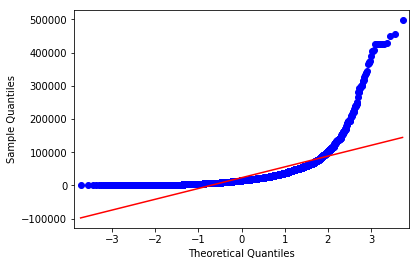

In [75]:
import statsmodels.api as sm
sm.qqplot(a['NetFare'],line='s')

In [76]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(a['NetFare'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.542, p=0.000
Sample does not look Gaussian (reject H0)


C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


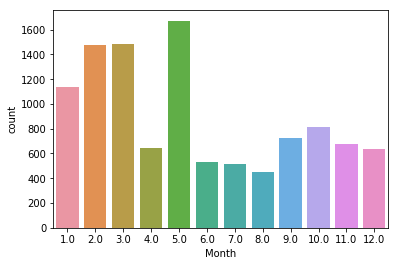

In [37]:
import seaborn as sb
sb.countplot(x='Month',data=a)


High count in the month of May mainly due to Summer vacation also we can see increasing trend in the month of Feb and  March

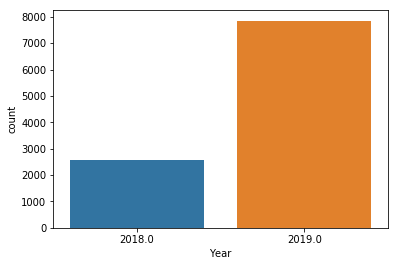

In [55]:
sb.countplot(x='Year',data=a)


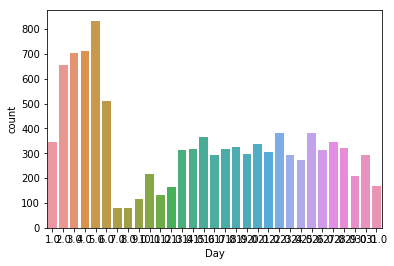

In [56]:
sb.countplot(x='Day',data=a)


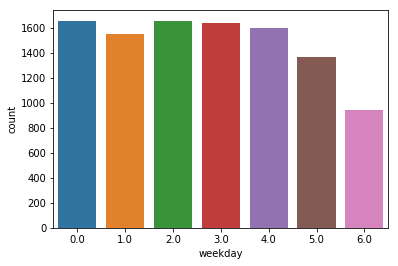

In [57]:
sb.countplot(x='weekday',data=a)


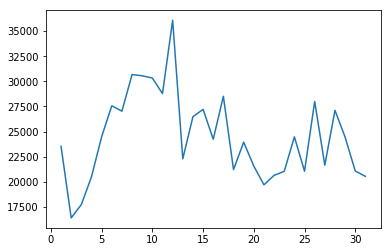

In [49]:
#plot of 31 days' avg netfare  
h=[]
r=range(1,32)
for i in range(1,32):
    d=a[a['Day']==i]
    Avg=np.mean(d['NetFare'])
    h.append(Avg)
    
plt.plot(r,h)

Average Netfare is comparatively higher on 12th day of the month and lower on 2nd day of the month

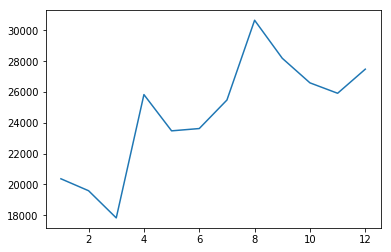

In [51]:
#plot of 12 months' avg netfare  
j=[]
r=range(1,13)
for i in range(1,13):
    d=a[a['Month']==i]
    Avg=np.mean(d['NetFare'])
    j.append(Avg)
    
plt.plot(r,j)


Netfare is higher in the month of August mainly due to Summer vacations in USA ,UK lies between August and September and lowest in March


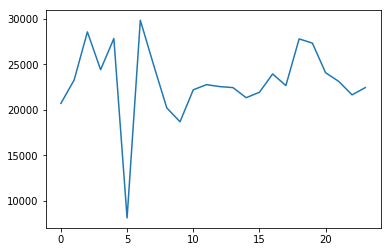

In [52]:
#plot of 24 hrs' avg netfare  
k=[]
r=range(0,24)
for i in range(0,24):
    Hrs=a[a['hour']==i]
    Avg=np.mean(Hrs['NetFare'])
    k.append(Avg)
plt.plot(r,k)


Avg Netfare shows a drop at 5am in the morning,post which it again spikes up

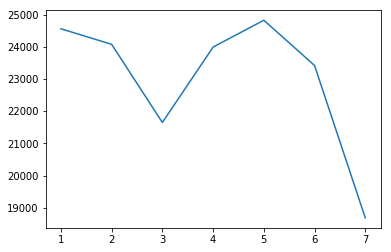

In [54]:
#plot of week days' avg netfare  
l=[]
r=range(1,8)
for i in range(0,7):
    Week=a[a['weekday']==i]
    Avg=np.mean(Week['NetFare'])
    l.append(Avg)
plt.plot(r,l)

Average nerfare is lower over the weekends and Monday

# Checking Missing Values for Numeric variables


In [66]:
df_dom.isnull().sum()

InvoiceDate      0
NetFare          0
ProductType      0
ItineraryType    0
Month            0
Day              0
Year             0
hour             0
weekday          0
dtype: int64

In [ ]:
#for col in df.columns:
#    df[col][df[col] < 0] = 0

In [67]:
temp= df_dom.drop('InvoiceDate',axis=1)

In [68]:
temp.head()

,NetFare,ProductType,ItineraryType,Month,Day,Year,hour,weekday
2,6550.0,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
3,6550.0,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
4,5497.0,Air,Domestic,11.0,30.0,2018.0,14.0,4.0
5,4818.0,Air,Domestic,1.0,12.0,2018.0,14.0,4.0
6,1768.0,Air,Domestic,11.0,30.0,2018.0,14.0,4.0


In [69]:
x = temp.drop('NetFare',axis=1)
y = temp['NetFare']

x.head()
#y.head()

,ProductType,ItineraryType,Month,Day,Year,hour,weekday
2,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
3,Air,Domestic,1.0,12.0,2018.0,13.0,4.0
4,Air,Domestic,11.0,30.0,2018.0,14.0,4.0
5,Air,Domestic,1.0,12.0,2018.0,14.0,4.0
6,Air,Domestic,11.0,30.0,2018.0,14.0,4.0


In [11]:
df.columns
df.ProductType.value_counts()

Air                           151995
payment                        55394
Charge                         32775
Other Product                  18692
Hotel                           7904
refund                          5495
Air Cancellation                4600
Other Product Cancellation       547
Air Debit Note                   535
Hotel Cancellation               289
Air Loss                         210
Other Product Debit Note          21
Hotel Loss                         4
Hotel Debit Note                   3
Name: ProductType, dtype: int64

In [4]:
df['ProductType']=pd.to_numeric(df['ProductType'], errors='coerce').fillna(0, downcast='infer')

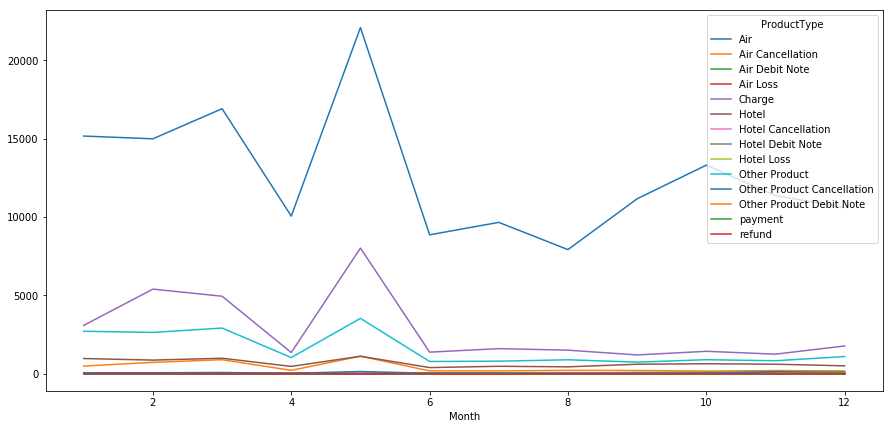

In [23]:
# Relation of Netfare and Producttype by Month
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['Month','ProductType']).count()['NetFare'].unstack().plot(ax=ax)

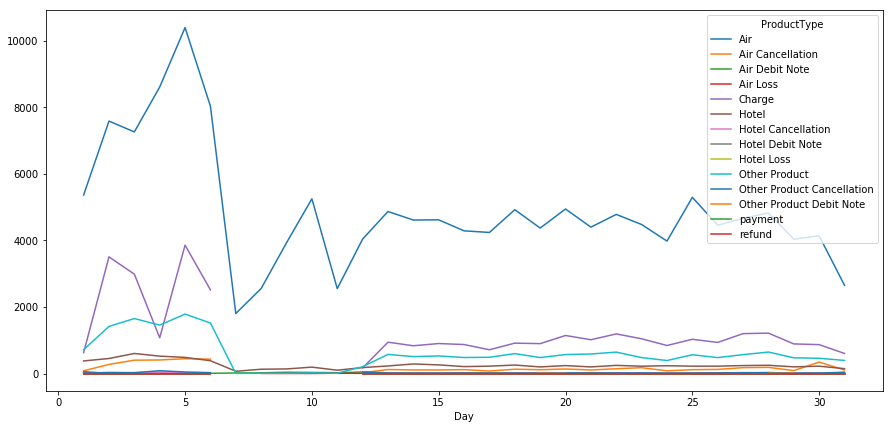

In [25]:
# Relation of Netfare and Producttype by Day
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['Day','ProductType']).count()['NetFare'].unstack().plot(ax=ax)

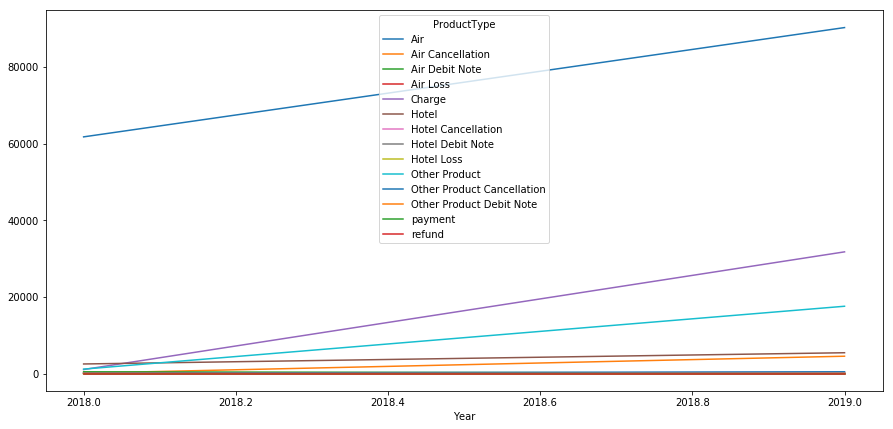

In [26]:
# Relation of Netfare and Producttype by Day
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['Year','ProductType']).count()['NetFare'].unstack().plot(ax=ax)

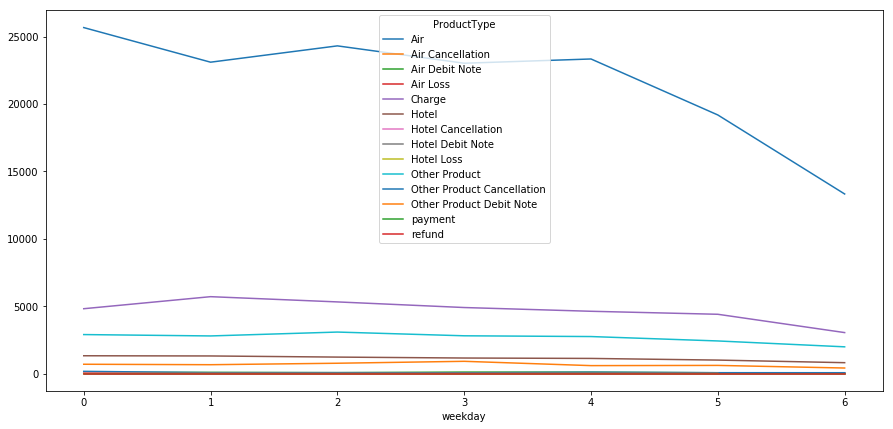

In [27]:
# Relation of Netfare and Producttype by weekday
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['weekday','ProductType']).count()['NetFare'].unstack().plot(ax=ax)

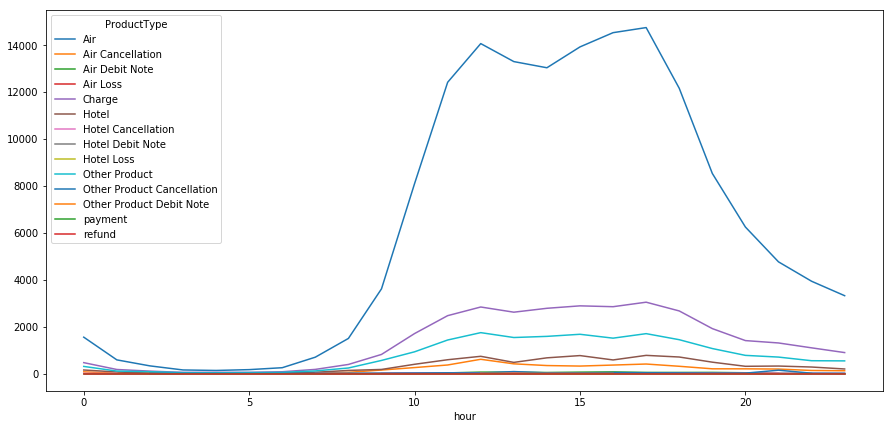

In [28]:
# Relation of Netfare and Producttype by hour
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['hour','ProductType']).count()['NetFare'].unstack().plot(ax=ax)

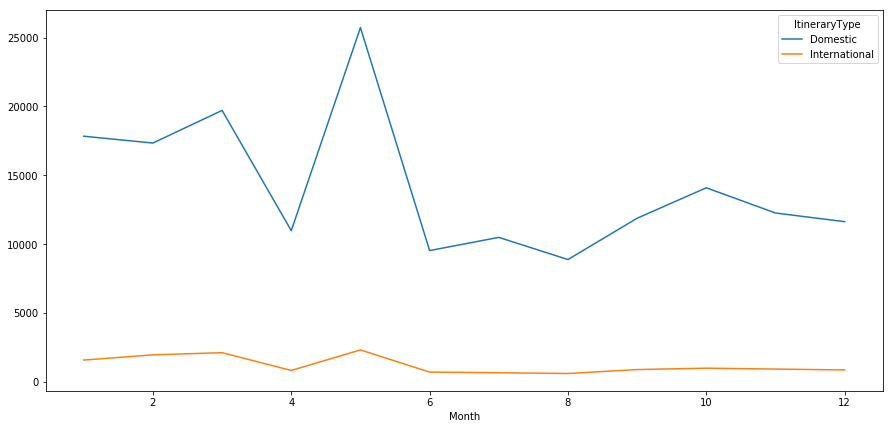

In [33]:
# Relation of Netfare and Iternitytype by Month
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['Month','ItineraryType']).count()['NetFare'].unstack().plot(ax=ax)

Trend of travel for both Domestic and Intl is almost same in the month of May i.e during vacations it's on higher side. Domestic Netfare shows a slight increase during Oct/November i.e festival season whereas INTL fares remains constant

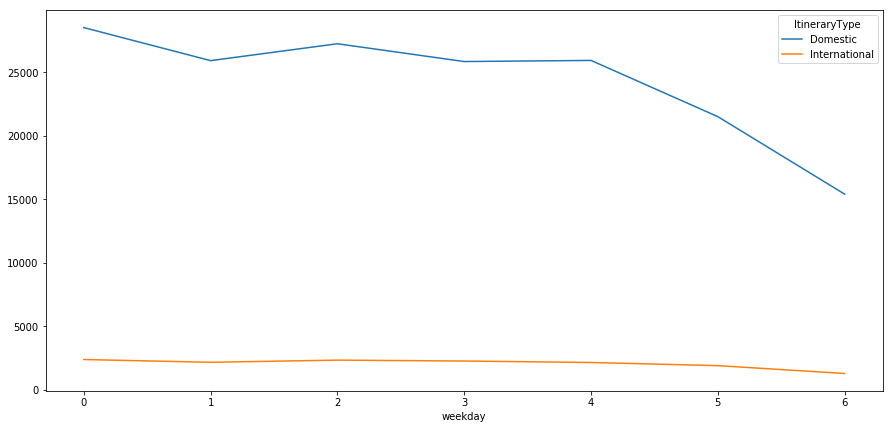

In [34]:
# Relation of Netfare and Iternitytype by weekday
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['weekday','ItineraryType']).count()['NetFare'].unstack().plot(ax=ax)

There are no fluctuations in the netfare for Intl whereas for Domestic we can see drop in the fare on Monday and starts picking up therefater. From Thursday , fares again starts dropping over the weekend

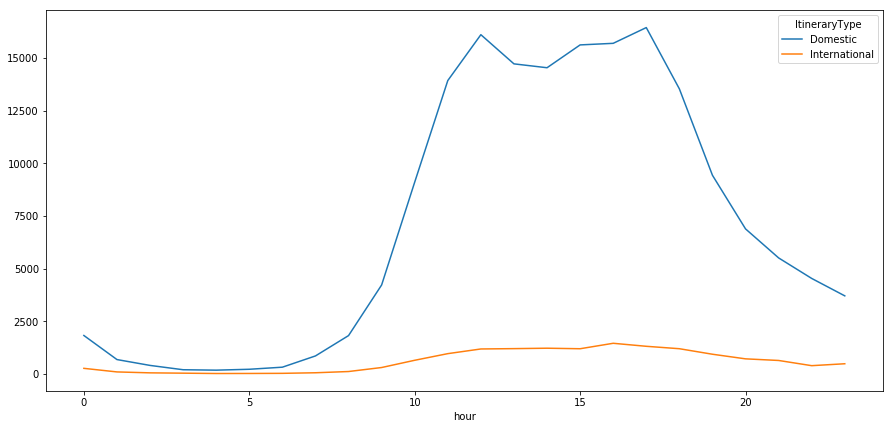

In [35]:
# Relation of Netfare and Iternitytype by hour
fig, ax = plt.subplots(figsize=(15,7))

count_prodtype=df.groupby(['hour','ItineraryType']).count()['NetFare'].unstack().plot(ax=ax)

For Domestic, shows upward trend during day time from 6am till evening 17:00 post which shows a drop in the count. It shows ppl prefer to travel during day time. For INTL, shows a constant trend except for a slight incrase from 7am in the morning

In [39]:
df_n = df.drop('InvoiceDate',axis=1)

In [40]:
df_n.columns

Index(['NetFare', 'ProductType', 'ItineraryType', 'Month', 'Day', 'Year',
       'hour', 'weekday'],
      dtype='object')

In [54]:
df_n.dtypes
df.columns
df.shape


(278466, 9)

In [56]:
###Duplicates
df_duplicate=df.duplicated(subset=['InvoiceDate', 'NetFare', 'ProductType', 'ItineraryType', 'Month',
       'Day', 'Year', 'hour', 'weekday'], keep='first')

df_duplicate.value_counts()

###Check this
#df_n['NetFare'] = pd.to_numeric(df_n['NetFare'])



False    192125
True      86341
dtype: int64

In [46]:
num = df_n._get_numeric_data()
num
#num[num < 0] = 0

,Month,Day,Year,hour,weekday
0,1.0,12.0,2018.0,11.0,4.0
1,1.0,12.0,2018.0,11.0,4.0
2,1.0,12.0,2018.0,13.0,4.0
3,1.0,12.0,2018.0,13.0,4.0
4,11.0,30.0,2018.0,14.0,4.0
...,...,...,...,...,...
278461,10.0,6.0,2019.0,20.0,6.0
278462,10.0,6.0,2019.0,21.0,6.0
278463,10.0,6.0,2019.0,22.0,6.0
278464,10.0,6.0,2019.0,22.0,6.0


In [45]:
num.isnull().sum()

Month      2
Day        2
Year       2
hour       2
weekday    2
dtype: int64

## Linear Regression

In [20]:
df.columns


Index(['NetFare', 'ProductType', 'ItineraryType', 'Month', 'Day', 'Year',
       'hour', 'weekday'],
      dtype='object')

In [23]:
from statsmodels.formula.api import ols

model = ols('NetFare ~ C(ProductType)', df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NetFare   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     2572.
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:25:40   Log-Likelihood:            -2.5798e+06
No. Observations:              245689   AIC:                         5.160e+06
Df Residuals:                  245676   BIC:                         5.160e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                     5928.9151     22.543    262.999      0.000    5884.730    5973.100
C(ProductType)[T.Air Cancellation]           -1.207e+04    131.532    -91.743      0.000   -1.23e+04   -1.18e+04
C(ProductType)[T.Air Debit Note]             -5887.5189    380.647    -15.467      0.000   -6633.576   -5141.462
C(ProductType)[T.Air Loss]                   -7773.3675    606.912    -12.808      0.000   -8962.900   -6583.835
C(ProductType)[T.Hotel]                        711.2190    101.396      7.014      0.000     512.486     909.952
C(ProductType)[T.Hotel Cancellation]         -1.498e+04    517.487    -28.954      0.000    -1.6e+04    -1.4e+04
C(ProductType)[T.Hotel Debit Note]           -5889.5818   5074.338     -1.161      0.246   -1.58e+04    4055.987
C(ProductType)[T.Hotel Loss]                 -7587.6651   4394.520     -1.727      0.084   -1.62e+04    1025.479
C(ProductType)[T.Other Product]              -5597.2409     68.123    -82.164      0.000   -5730.760   -5463.722
C(ProductType)[T.Other Product Cancellation] -6468.8572    376.463    -17.183      0.000   -7206.715   -5731.000
C(ProductType)[T.Other Product Debit Note]   -5777.2008   1918.033     -3.012      0.003   -9536.495   -2017.906
C(ProductType)[T.payment]                    -5928.9151     43.620   -135.923      0.000   -6014.409   -5843.422
C(ProductType)[T.refund]                     -5928.9151    120.688    -49.126      0.000   -6165.460   -5692.370
==============================================================================
Omnibus:                   466907.020   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       4825857860.019
Skew:                          14.004   Prob(JB):                         0.00
Kurtosis:                     689.023   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
import statsmodels.api as sm
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 12, 245676) =  2571.562, p =  0.0000


,sum_sq,df,F,PR(>F)
C(ProductType),2.383690e+12,12.0,2571.562172,0.0
Residual,1.897729e+13,245676.0,NaN,NaN


P value is 0.000. The true p-value is not 0.000. Actual p value is less than 0.0005 and using bulit in rounding rules it is rounded down and reported as 0.000. Typically it is reported as p<.001.
p of 0.0000 means reasults are highly significant , so ProductType is a significant variable has overall significant effect on Netfare

In [26]:
###Let's Check the variable Iternity Type
model2 = ols('NetFare ~ C(ItineraryType)', df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                NetFare   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                 1.473e+04
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:45:11   Log-Likelihood:            -2.5872e+06
No. Observations:              245689   AIC:                         5.174e+06
Df Residuals:                  245687   BIC:                         5.174e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                          3110.0921     19.084    162.972      0.000    3072.689    3147.495
C(ItineraryType)[T.International]  8027.0370     66.133    121.376      0.000    7897.417    8156.657
==============================================================================
Omnibus:                   424495.921   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3479331790.375
Skew:                          11.279   Prob(JB):                         0.00
Kurtosis:                     585.553   Cond. No.                         3.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
import statsmodels.api as sm
# Seeing if the overall model is significant
print(f"Overall model F({model2.df_model: .0f},{model2.df_resid: .0f}) = {model2.fvalue: .3f}, p = {model2.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model2, typ= 2)
res

Overall model F( 1, 245687) =  14732.212, p =  0.0000


,sum_sq,df,F,PR(>F)
C(ItineraryType),1.208415e+12,1.0,14732.211694,0.0
Residual,2.015257e+13,245687.0,NaN,NaN


It shows that ItineraryType is statistically significant

In [ ]:

###Let's Check the variable Iternity Type
#model3 = ols('NetFare ~ C(ProductType) * C(ItineraryType)*C(Month)*C(Day)*C(Year)*C(hour)*C(weekday)', df).fit()
#model3.summary()
#import statsmodels.api as sm
## Seeing if the overall model is significant
#print(f"Overall model F({model3.df_model: .0f},{model3.df_resid: .0f}) = {model3.fvalue: .3f}, p = {model3.f_pvalue: .4f}")

## Creates the ANOVA table
#res = sm.stats.anova_lm(model3, typ= 2)
#res

In [6]:
import pathlib
pathlib.Path().absolute()

WindowsPath('C:/Users/Smita Gavandi')

# Domestic

In [3]:
data=pd.read_csv(r"D:\R Excel Sessions\Projects\Airline Predictions\dom_air.csv")

In [4]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Day'] = pd.DatetimeIndex(data['InvoiceDate']).day
data['Month'] = pd.DatetimeIndex(data['InvoiceDate']).month


In [5]:
data.head()
#####Daywise pivot for Netfare 
heatmap_y_day= pd.pivot_table(data=data,values="NetFare",columns="Day",aggfunc="mean",fill_value=0)
heatmap_y_day


Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
NetFare,4778.151105,4621.476111,4519.418316,4685.225118,4637.791714,4958.997629,4577.560324,4813.707213,4961.806433,4618.978642,...,4812.577439,4570.529878,4666.276682,4370.601759,4589.450691,4738.615688,4659.30429,4702.229379,4692.03329,4707.565147


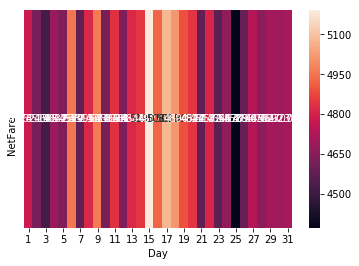

In [7]:
import seaborn as sns
sns.heatmap(heatmap_y_day,annot=True,fmt="g")


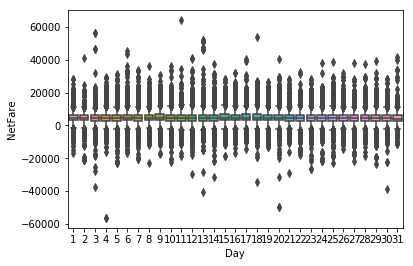

In [8]:
sns.boxplot(x="Day",y="NetFare",data=data)


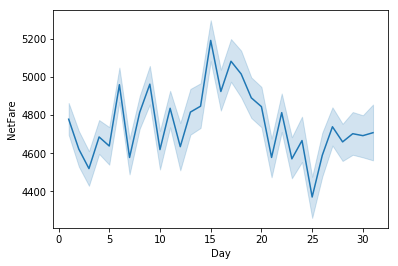

In [9]:
sns.lineplot(x="Day",y="NetFare",data=data)


In [10]:
#####Monthwise pivot for Netfare 
heatmap_y_month= pd.pivot_table(data=data,values="NetFare",columns="Month",aggfunc="mean",fill_value=0)
heatmap_y_month


Month,1,2,3,4,5,6,7,8,9,10,11,12
NetFare,4477.620597,4830.213884,4724.465982,5208.386342,4953.316523,4634.791723,3977.92682,4542.490046,4026.535972,4787.385169,5079.788399,5020.346558


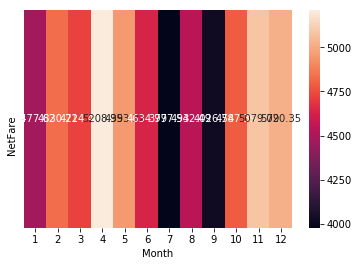

In [11]:
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


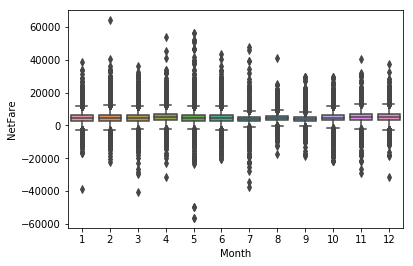

In [12]:
sns.boxplot(x="Month",y="NetFare",data=data)


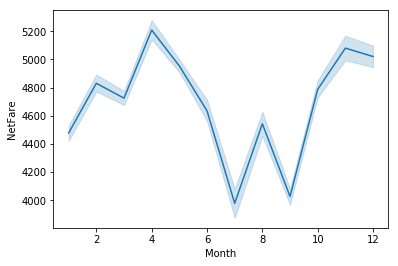

In [13]:
sns.lineplot(x="Month",y="NetFare",data=data)


In [14]:
####Check for Stationarity
from statsmodels.tsa.stattools import adfuller
def adf_test(series):    
    result = adfuller(series.dropna())  
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)
    #for key,val in result[4].items():
        #out[f'critical value ({key})']=val
    if result[1] <= 0.05:
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

adf_test(data['NetFare'])


Reject the null hypothesis
Data is stationary


In [15]:
#Data is stationary


# International

In [17]:
data=pd.read_csv(r"D:\R Excel Sessions\Projects\Airline Predictions\Concatenate_B2C_B2E.csv")

C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
d=data

d=d[d['ItineraryType']=='International']
d.shape


(20458, 4)

In [19]:
data['NetFare'] = data['NetFare'].apply(pd.to_numeric, errors='coerce')


C:\Users\Smita Gavandi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


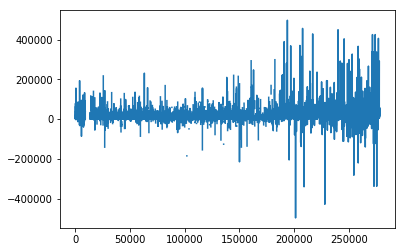

In [20]:
###There are 20,458 records for INTL
d['NetFare'] = d['NetFare'].apply(pd.to_numeric, errors='coerce')

d.NetFare.plot()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  405 non-null    datetime64[ns]
 1   NetFare      405 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.5 KB


(405, 2)

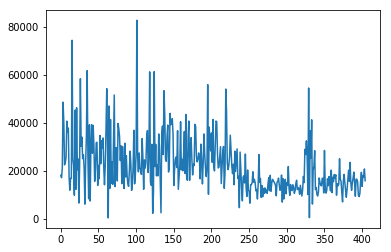

In [21]:
df_orig = pd.read_csv("D:\\R Excel Sessions\\Projects\\Airline Predictions\Pooja\\international.csv",parse_dates=['InvoiceDate'])
df =df_orig.copy()   #creating a copy of it
df.columns
df.head(10)
df.info()
df.NetFare.plot()
df.shape



In [22]:
####DickyFuller Test

adf_test(data['NetFare'])


Reject the null hypothesis
Data is stationary


In [23]:
###Data is stationary

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).day
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month


In [25]:
#####Daywise pivot for Netfare 
df.head()
df.shape
heatmap_y_day= pd.pivot_table(data=df,values="NetFare",columns="Day",aggfunc="mean",fill_value=0)
heatmap_y_day


Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
NetFare,14652.4213,12547.509307,12994.539902,20677.341421,21996.886684,22386.01823,24593.845336,26753.653803,28635.199315,36342.967228,...,21277.105963,18032.837239,26079.141969,17597.966058,23395.791175,18622.927022,19674.921143,17999.083282,24821.864744,17778.807228


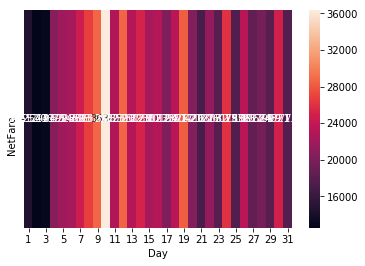

In [26]:
sns.heatmap(heatmap_y_day,annot=True,fmt="g")


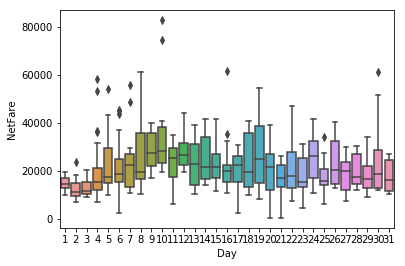

In [27]:
sns.boxplot(x="Day",y="NetFare",data=df)


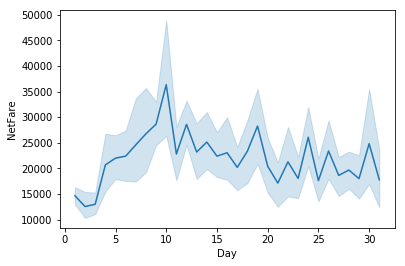

In [28]:
sns.lineplot(x="Day",y="NetFare",data=df)


In [29]:
#####Monthwise pivot for Netfare 
heatmap_y_month= pd.pivot_table(data=df,values="NetFare",columns="Month",aggfunc="mean",fill_value=0)
heatmap_y_month


Month,1,2,3,4,5,6,7,8,9,10,11,12
NetFare,17606.418872,18193.081969,15692.964029,24827.809951,21243.370335,21725.852804,24696.418353,21707.879142,26769.638901,24813.5336,24854.930988,21951.858675


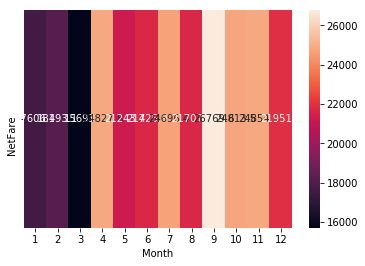

In [30]:
sns.heatmap(heatmap_y_month,annot=True,fmt="g")


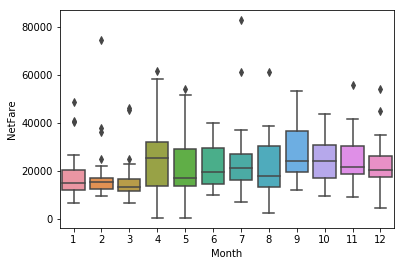

In [31]:
sns.boxplot(x="Month",y="NetFare",data=df)


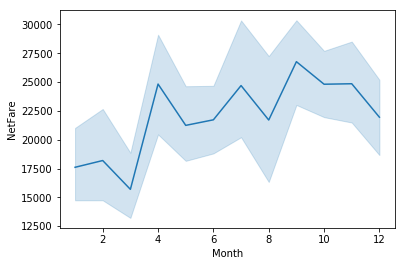

In [32]:
sns.lineplot(x="Month",y="NetFare",data=df)


In [34]:
import pathlib
pathlib.Path().absolute()


WindowsPath('C:/Users/Smita Gavandi')